#### Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#### Load Data

In [2]:
data = pd.read_csv("fake_job_postings.csv")
data.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


#### Preprocess Data 
- Encode (One Hot encoding)
- Scale (set values to in between 0 and 1)

In [3]:
X = data.drop('fraudulent', axis=1)
y = data['fraudulent']

Encoding

In [4]:
# Encoding categorical variables
category_vars = ['employment_type', 'required_experience', 'required_education']
le = LabelEncoder()
oe = OneHotEncoder()

# encode categorical variables
X[category_vars] = X[category_vars].apply(le.fit_transform)
X = pd.get_dummies(X, columns=category_vars, dtype=float)

# one-hot encode categorical variables
X = oe.fit_transform(X).toarray()               # results in around 70k features

17880 x 70k

In [5]:
X.shape

(17880, 69349)

Scaling

In [106]:
sc = StandardScaler()
X = sc.fit_transform(X)

#### Split Data
- training
- validation
- test

In [107]:
# Split the dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

#### Build Model

In [108]:
# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               8876800   
                                                                 
 activation_24 (Activation)  (None, 128)               0         
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 activation_25 (Activation)  (None, 64)                0         
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                

#### Compile Model

In [109]:
model.compile(loss='binary_crossentropy', 
              optimizer=SGD(learning_rate=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics=['accuracy'])

#### Add Early Stop

In [110]:
# Set early stopping criteria
early_stop = EarlyStopping(monitor='val_loss',      # validation loss wird beobachtet
                           patience=5,              # nach 5 Epochen ohne Verbesserung wird abgebrochen 
                           mode='min')              # stoppt, wenn der Wert nicht mehr sinkt

#### Train Model

In [111]:
history = model.fit(X_train, y_train, 
                    batch_size=64, 
                    epochs=100, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stop])

Epoch 1/100
179/179 [==============================] - 9s 47ms/step - loss: 0.1655 - accuracy: 0.9556 - val_loss: 0.0854 - val_accuracy: 0.9745
Epoch 2/100
179/179 [==============================] - 5s 27ms/step - loss: 0.0193 - accuracy: 0.9967 - val_loss: 0.0732 - val_accuracy: 0.9794
Epoch 3/100
179/179 [==============================] - 5s 27ms/step - loss: 0.0038 - accuracy: 0.9995 - val_loss: 0.0751 - val_accuracy: 0.9769
Epoch 4/100
179/179 [==============================] - 5s 27ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0760 - val_accuracy: 0.9748
Epoch 5/100
179/179 [==============================] - 5s 27ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0778 - val_accuracy: 0.9734
Epoch 6/100
179/179 [==============================] - 5s 27ms/step - loss: 7.9315e-04 - accuracy: 0.9997 - val_loss: 0.0788 - val_accuracy: 0.9727
Epoch 7/100
179/179 [==============================] - 5s 27ms/step - loss: 8.1555e-04 - accuracy: 0.9999 - val_loss: 0.0807 - val_a

#### Evaluate Model

In [112]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=64)
print("Test accuracy:", accuracy)

56/56 [==============================] - 1s 11ms/step - loss: 0.0702 - accuracy: 0.9785
Test accuracy: 0.978467583656311


#### Confusionmatrix

112/112 [==============================] - 1s 7ms/step


<Figure size 800x800 with 0 Axes>

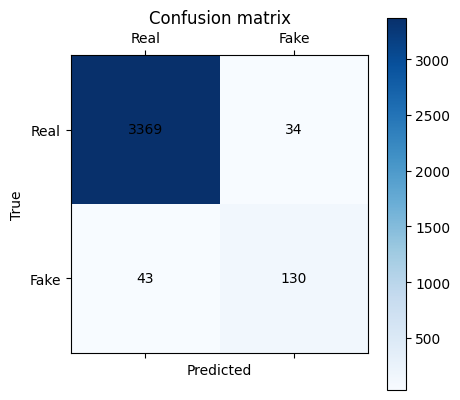

In [126]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a plot of the confusion matrix
labels = ['Real', 'Fake']
fig = plt.figure(figsize=(8,8))
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion matrix')
plt.xticks([0,1], labels)
plt.yticks([0,1], labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='black')
plt.show();